In [1]:
import graspy
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\dfran\Miniconda3\envs\ndd_5\lib\

In [2]:
from graspy.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05],
     [0.1, 0.4, 0.15],
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)
from graspy.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

In [3]:
X.shape

(150, 3)

# One GMM Fit for all data on all axes

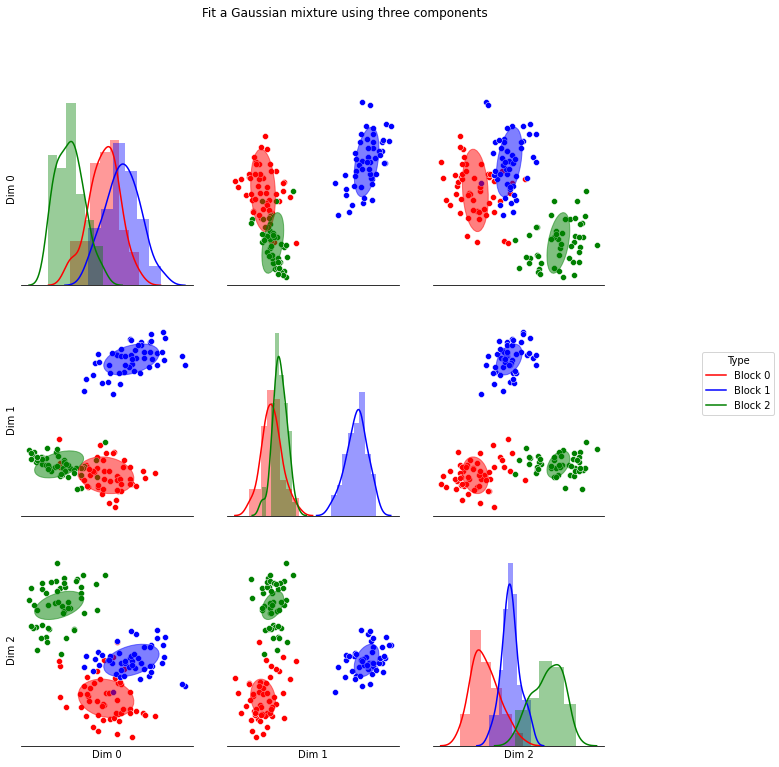

In [4]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns

color_iter = {0:'red', 1: 'blue', 2: 'green', 3: 'purple', 4:'pink'}


def plot_results(X, gmm):
    f, axes = plt.subplots(X.shape[1],X.shape[1], figsize=(12, 12))    
    sns.despine(left=True)
    counter = 1
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
    for k in range(X.shape[1]):
        for j in range(X.shape[1]):            
            if k == j:
                for t in range(X.shape[1]):
                    sns.distplot(X[Y_ == t, k], kde=True, color=color_iter[t], ax=axes[k, k])
                axes[k,j].set_xticks([])
                axes[k,j].set_yticks([])
                axes[k,j].set_ylabel(None)
                axes[k,j].set_ylabel(j)
                axes[k,j].set_xlabel(k)
            else:                 
                for i, (mean, covar) in enumerate(zip(
                        means, covariances)):                   
                    v, w = linalg.eigh(covar)
                    v = 2. * np.sqrt(2.) * np.sqrt(v)
                    u = w[0] / linalg.norm(w[0])                    
                    # as the DP will not use every component it has access to
                    # unless it needs it, we shouldn't plot the redundant
                    # components.
                    if not np.any(Y_ == i):
                        
                        continue
                    sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax=axes[k,j] )

                    # Plot an ellipse to show the Gaussian component
                    angle = np.arctan(u[1] / u[0])
                    angle = 180. * angle / np.pi  # convert to degrees
                    ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color_iter[i])
                    ell.set_clip_box(axes[k,j].bbox)
                    ell.set_alpha(0.5)
                    axes[k,j].add_artist(ell)
                    axes[k,j].set_xticks([])
                    axes[k,j].set_yticks([])
                    axes[k,j].set_ylabel(k)
                    axes[k,j].set_xlabel(k)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            axes[i,j].set_ylabel("Dim " + str(i))
            axes[i,j].set_xlabel("Dim " + str(j))

    for ax in axes.flat:
        ax.label_outer()
    f.suptitle("Fit a Gaussian mixture using three components")
    f.legend(labels=['Block {}'.format(i) for i in range(X.shape[1])],
       loc="right",   # Position of legend
     # Small spacing around legend box
       title="Type"  # Title for the legend
       )
    plt.subplots_adjust(right=.8)
   
#Fit a Gaussian mixture with EM using three components
gmm = GaussianMixture(n_components=X.shape[1], covariance_type='full').fit(X)
plot_results(X, gmm)

# Forming only Scatter plot when data is 2D

<Figure size 432x288 with 0 Axes>

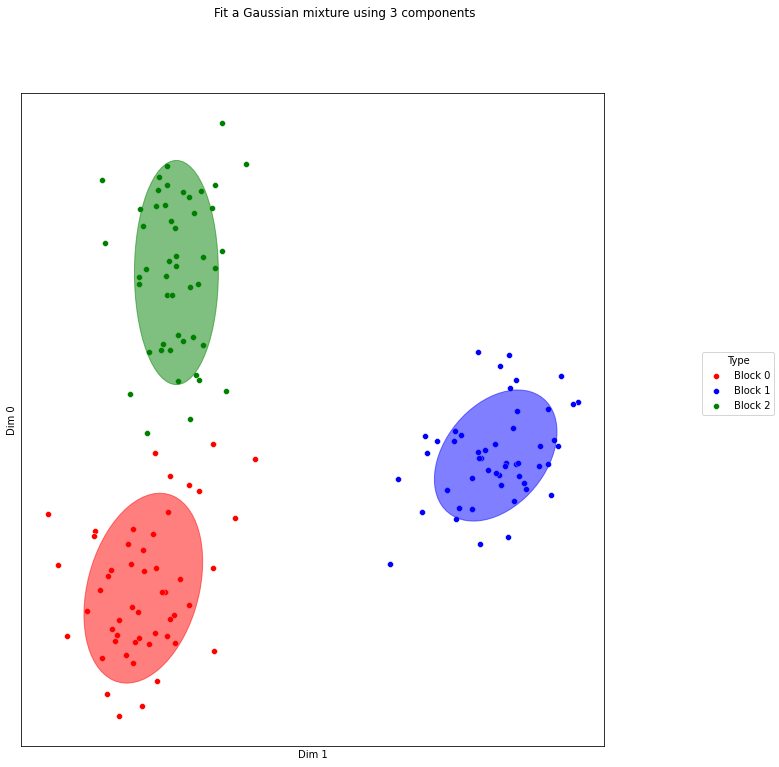

In [5]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
color_iter = {0:'red', 1: 'blue', 2: 'green', 3: 'purple', 4:'pink'}
def plot_ellipse(X, Y_, means, covariances, ax, j, k):
    for i, (mean, covar) in enumerate(zip(means, covariances)):                   
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if not np.any(Y_ == i):
            continue        
        sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax = ax)        
        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi
        ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color_iter[i])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(k)
        ax.set_xlabel(k)

def plot_results(X, gmm):    
    sns.despine(left=True)
    #get relevant data from the gmm model 
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_
    #plot only a scatter plot with only two feature columns 
    if X.shape[1] == 2:
        f, axes = plt.subplots(1,1, figsize=(12, 12)) 
        #keep same style where j is the x axis and k is the y axis
        plot_ellipse(X, Y_, means, covariances, axes, 0, 1)
        axes.set_ylabel("Dim " + str(0))
        axes.set_xlabel("Dim " + str(1))
        f.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
        f.legend(labels=['Block {}'.format(i) for i in range(means.shape[0])], loc="right", title="Type")
        plt.subplots_adjust(right=.8)
        return 
    #for more than two features compared
    f, axes = plt.subplots(X.shape[1],X.shape[1], figsize=(12, 12))    
    for k in range(X.shape[1]):
        for j in range(X.shape[1]):            
            if k == j:
                for t in range(X.shape[1]):
                    sns.distplot(X[Y_ == t, k], kde=True, color=color_iter[t], ax=axes[k, k])
                axes[k,j].set_xticks([])
                axes[k,j].set_yticks([])
                axes[k,j].set_ylabel(None)
                axes[k,j].set_ylabel(j)
                axes[k,j].set_xlabel(k)
            else:               
                plot_ellipse(X, Y_, means, covariances, axes[k,j], j, k)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            axes[i,j].set_ylabel("Dim " + str(i))
            axes[i,j].set_xlabel("Dim " + str(j))
    for ax in axes.flat:
        ax.label_outer()
    f.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
    f.legend(labels=['Block {}'.format(i) for i in range(X.shape[1])], loc="right", title="Type")
   
    plt.subplots_adjust(right=.8)

    
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X[:, 1:])
plot_results(X[:, 1:], gmm)

In [ ]:
if labels:
        set_labs = set(labels)
        lab_dict = {}
        counter = 0
        ind_to_lab = {}
        for lab in set_labs:
            lab_dict[lab] = counter
            ind_to_lab[counter] = lab 

# With labeled data 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
{'Block 2': 0, 'Block 3': 1, 'Block 1': 2}
{0: 'Block 2', 1: 'Block 3', 2: 'Block 1'}


<Figure size 432x288 with 0 Axes>

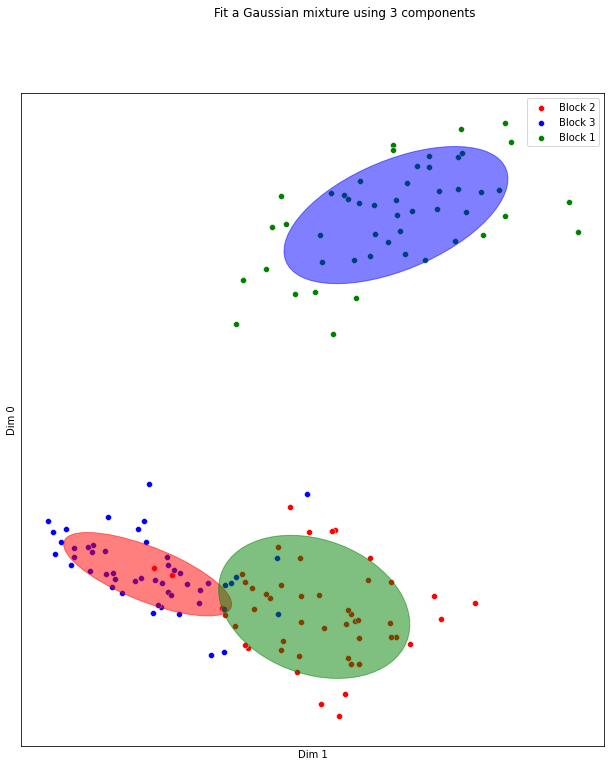

In [20]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture
import seaborn as sns
labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50
color_iter = {0:'red', 1: 'blue', 2: 'green', 3: 'purple', 4:'pink'}
colors = ['red', 'blue', 'green']
def plot_ellipse(X, Y_, means, covariances, ax, j, k, lab_dict = None, ind_to_lab = None):
    for i, (mean, covar, color) in enumerate(zip(means, covariances, colors)):                   
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if lab_dict and ind_to_lab: 
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color,ax = ax, label =  ind_to_lab[i])  
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color)
        else: 
            if not np.any(Y_ == i):
                continue  
            sns.scatterplot(X[Y_ == i, j], X[Y_ == i, k], color=color_iter[i],ax = ax, label = 'Block {}'.format(i) )        
            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi
            ell = mpl.patches.Ellipse([mean[j], mean[k]], v[0], v[1], 180. + angle, color=color_iter[i])
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(k)
        ax.set_xlabel(k)

def plot_results(X, gmm, labels = None):    
    sns.despine(left=True)
    #get relevant data from the gmm model 
    Y_, means, covariances = gmm.predict(X), gmm.means_, gmm.covariances_        
    #plot only a scatter plot with only two feature columns 
    lab_dict = {}
    ind_to_lab = {}
    if labels:
        set_labs = set(labels)
        lab_dict = {}
        counter = 0
        ind_to_lab = {}
        for lab in set_labs:
            lab_dict[lab] = counter
            ind_to_lab[counter] = lab 
            counter += 1
    if X.shape[1] == 2:
        f, axes = plt.subplots(1,1, figsize=(12, 12)) 
        #keep same style where j is the x axis and k is the y axis
        if labels: 
            Y_ = [lab_dict[labels[i]] for i in range(len(labels))]
            Y_ = np.asarray(Y_)
            print(Y_)
            print(lab_dict)
            print(ind_to_lab)
            plot_ellipse(X, Y_, means, covariances, axes, 0, 1, lab_dict,  ind_to_lab)
        else: 
            plot_ellipse(X, Y_, means, covariances, axes, 0, 1)
        axes.set_ylabel("Dim " + str(0))
        axes.set_xlabel("Dim " + str(1))
        f.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
        #f.legend(labels=['Block {}'.format(i) for i in range(means.shape[0])], loc="right", title="Type")
        plt.subplots_adjust(right=.8)
        return 
    #for more than two features compared
    f, axes = plt.subplots(X.shape[1],X.shape[1], figsize=(12, 12))    
    for k in range(X.shape[1]):
        for j in range(X.shape[1]):            
            if k == j:
                for t in range(X.shape[1]):
                    sns.distplot(X[Y_ == t, k], kde=True, color=color_iter[t], ax=axes[k, k])
                axes[k,j].set_xticks([])
                axes[k,j].set_yticks([])
                axes[k,j].set_ylabel(None)
                axes[k,j].set_ylabel(j)
                axes[k,j].set_xlabel(k)
            else:               
                plot_ellipse(X, Y_, means, covariances, axes[k,j], j, k)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            axes[i,j].set_ylabel("Dim " + str(i))
            axes[i,j].set_xlabel("Dim " + str(j))
    for ax in axes.flat:
        ax.label_outer()
    f.suptitle("Fit a Gaussian mixture using " + str(means.shape[0]) + " components")
    handles, labels = [], []
    for ax in axes.flat:
        legend = ax.legend()
        legend.remove()
        handles_, labels_ = ax.get_legend_handles_labels()
        handles += handles_
        labels += labels_
    f.legend(handles[:means.shape[0]], labels[:means.shape[0]], loc='center right')

    
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X[:, :2])
plot_results(X[:, :2], gmm, labels)